In [11]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')

In [3]:
path = "../data/house_price/"
train_path = path + 'train.csv'
train = pd.read_csv(train_path)

In [14]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Analysing 'SalePrice'

In [4]:
price = train['SalePrice']
price.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

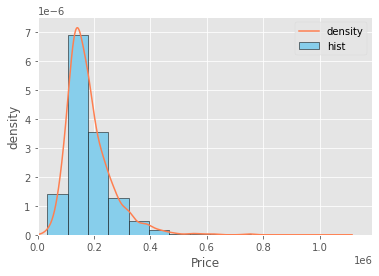

In [6]:
price.plot(kind='hist',color="skyblue",density=True,edgecolor='black',label='hist')
price.plot(kind='density',color='coral',label='density')
plt.xlabel('Price')
plt.ylabel('density')
# plt.style.use('ggplot')
plt.style.use('seaborn-notebook')
plt.xlim(left=0)
plt.legend()


## Variables

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

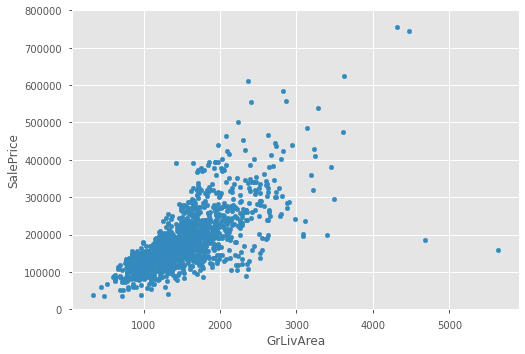

In [10]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'],train[var],],axis=1)
data.plot(kind='scatter',x=var,y='SalePrice',ylim=(0,800000))

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

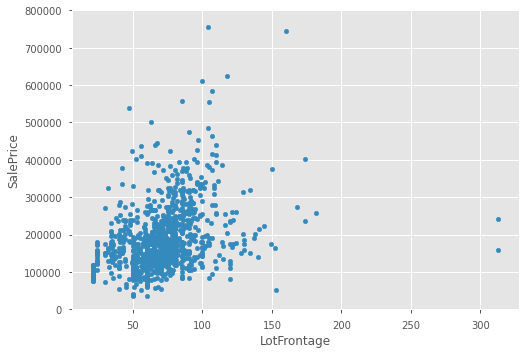

In [12]:
var = 'LotFrontage'
data = pd.concat([train['SalePrice'],train[var],],axis=1)
data.plot(kind='scatter',x=var,y='SalePrice',ylim=(0,800000))

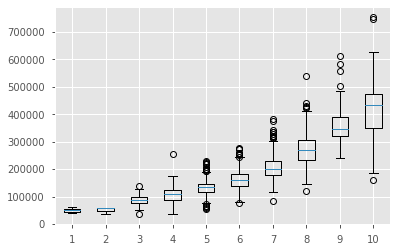

In [58]:
var = 'OverallQual'
idx = [np.reshape(np.argwhere(np.array(train[var])==i),-1) for i in range(1,11)]
fig, ax = plt.subplots()
ax.boxplot([train['SalePrice'][idx[i]] for i in range(10)])
plt.show()

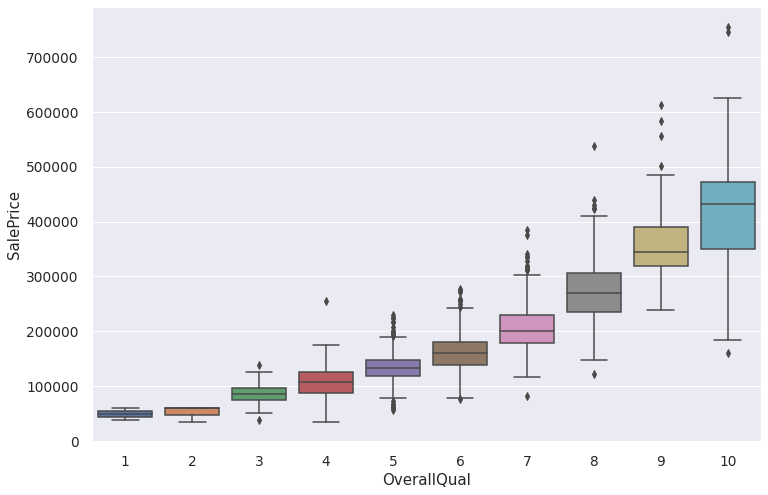

In [10]:
import seaborn as sns
var = 'OverallQual'
data = pd.concat([train[var],train['SalePrice']],axis=1)
fig, ax = plt.subplots(figsize=(12,8))
fig = sns.boxplot(x=var,y='SalePrice',data=data)
# plt.xticks()

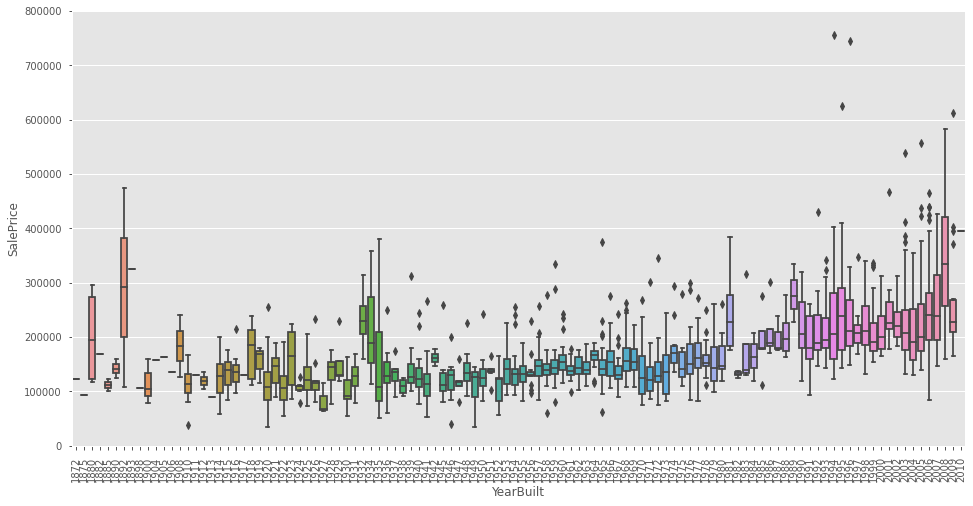

In [5]:
import seaborn as sns
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);
plt.style.use('seaborn-notebook')

(38, 38)


<AxesSubplot:>

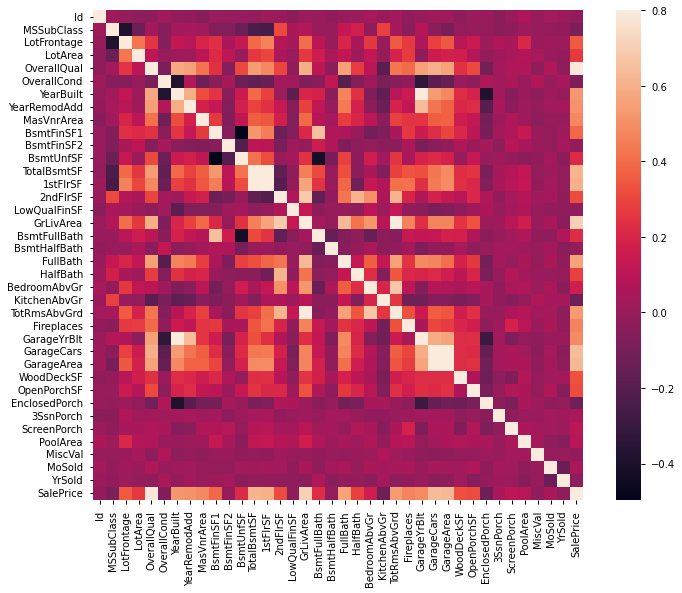

In [12]:
corrmat = train.corr()
print(corrmat.shape)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

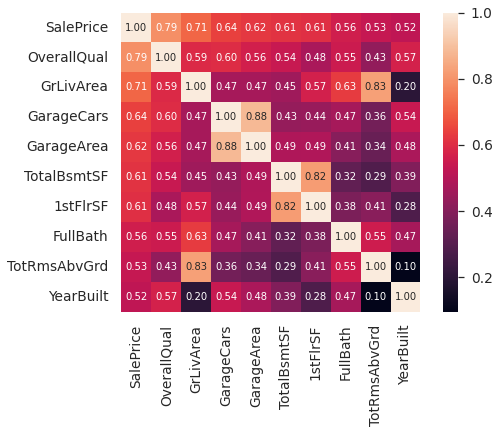

In [8]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [17]:
var1, var2 = 'GrLivArea', 'TotRmsAbvGrd'
item1 = np.array(train[var1])
item2 = np.array(train[var2])
np.corrcoef(item1,item2)

array([[1.        , 0.82548937],
       [0.82548937, 1.        ]])

Multi-variable correlation

In [ ]:
train.columns[0]

In [28]:
non_text_items = [item for item in train.columns if train[item].dtype==np.int64 or train[item].dtype==np.float64]
len(non_text_items)

(38,
 ['Id',
  'MSSubClass',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold',
  'SalePrice'])

In [31]:
'Id' in train.columns

True

In [4]:
# correlation threshold is 0.64
corrmat = np.array(train.corr())
idxs_gt08 = np.argwhere(corrmat >= 0.5 * corrmat.max()).tolist()
idxs_not1 = np.argwhere(corrmat <= 0.99 * corrmat.max()).tolist()
idxs = [idx for idx in idxs_gt08 if (idx in idxs_not1) and (idx[0] < idx[1])]
print(len(idxs))
print("High correlation between:")
for idx in idxs:
    print(idx, 'corr=', corrmat[idx[0], idx[1]])

38
High correlation between:
[4, 6] corr= 0.5723227689623621
[4, 7] corr= 0.5506839241941717
[4, 12] corr= 0.5378084986123907
[4, 16] corr= 0.5930074300286512
[4, 19] corr= 0.5505997093682543
[4, 25] corr= 0.5477658448351629
[4, 26] corr= 0.6006707165907149
[4, 27] corr= 0.5620217566126083
[4, 37] corr= 0.7909816005838053
[6, 7] corr= 0.5928549763436519
[6, 25] corr= 0.8256674841743408
[6, 26] corr= 0.5378500917111052
[6, 37] corr= 0.5228973328794967
[7, 25] corr= 0.6422767797035356
[7, 37] corr= 0.5071009671113866
[9, 12] corr= 0.5223960519923867
[9, 17] corr= 0.6492117535742649
[12, 13] corr= 0.8195299750050339
[12, 37] corr= 0.6135805515591943
[13, 16] corr= 0.5660239689357486
[13, 37] corr= 0.6058521846919153
[14, 16] corr= 0.6875010641666033
[14, 20] corr= 0.6097073002717436
[14, 21] corr= 0.5029006133459056
[14, 23] corr= 0.6164226354915431
[16, 19] corr= 0.6300116462511148
[16, 21] corr= 0.5212695109189948
[16, 23] corr= 0.8254893743088425
[16, 37] corr= 0.7086244776126515
[19, 

Variable-SalePrice correlation

In [36]:
idxs = np.argsort(corrmat[-1,:])[-6:-1]
print("High corr with SalePrice:")
for idx in idxs:
    print(idx,'corr=',corrmat[-1,idx])

High corr with SalePrice:
12 corr= 0.6135805515591943
27 corr= 0.6234314389183622
26 corr= 0.6404091972583519
16 corr= 0.7086244776126515
4 corr= 0.7909816005838053


4: OverallQual
12: 

# Conclusion


## SalePrice is in __linear__ relation with the following params:

- GrLivArea: Above grade (ground) living area square feet

## SalePrice is in __exp linear__ relation with the following params:

## SalePrice is in __linear__ relation with the following params:
